## Statistics and Probability basic data analysis

__Dataset link:__ https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric

__Dataset description:__ this dataset is containing data about patients, who struggled with breast cancer. This dataset was collected by british scientists in 2016.   
Dataset has 693 features, each row represents a human. Among the strings there are age of patient at diagnosis time, type of cancer, type of surgery, chemotherapy, mutation count and others.

__Video presentation:__

5 mins: https://youtu.be/s3G_SWAhQ0k  
Full: https://youtu.be/R9hSS6OjBIw

## Step 0: load data

In [1]:
df <- read.csv("METABRIC_RNA_Mutation.csv")
df

patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_._claudin.low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,,0,claudin-low,1,Positve,...,0,0,0,0,0,0,0,0,0,0
2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,0,0,0,0,0,0,0,0,0,0
5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
14,56.45,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
22,89.08,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,0,claudin-low,1,Positve,...,0,0,0,0,0,0,0,0,0,0
28,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0


I will choose the column called `age_at_diagnosis`. It represents how old were the people, when they got breast cancer diagnosis. This is one of numerical (double) columns in this dataset that is meaningful for people, who isn't connected to medicine itself. It is interesting to find age of patients statistics metrics.

In [2]:
#data <- as.vector(df[['age_at_diagnosis']]) # we can do it this way too
data <- as.vector(df$age_at_diagnosis)

In [3]:
print(class(data))
print(typeof(data))

[1] "numeric"
[1] "double"


## Step 1: find base estimators

_Note:_ here we think, that we are having not all the population items, but we are working with sample, so we can find only estimators values. Later we will assume, that data distribution can be normal.

__Sample mean:__

$$\overline{X} = \frac{1}{N}(X_1+...X_N)$$


In [4]:
# using function
mean(data)

[1] 61.08705

In [5]:
# using formula

suming = 0

for (d in data)
{
    suming <- suming + d
}

m <- suming / length(data)

print(m)

[1] 61.08705


__Sample median:__

1) if $n$ is odd, the $\frac{n+1}{2}$-th smallest observation  
2) if $n$ is even, any number between the $\frac{n}{2}$-th smallest and the $\frac{n+1}{2}$-th smallest observation (typically used mean of these two observations)

In [6]:
# using function

median(data)

[1] 61.77

In [7]:
# unsing calculation
sorted <- sort(data)
sorted

[1] 21.93 26.36 26.72 27.56 28.04 28.29 28.37 28.62 28.78 28.96 29.92 29.98
  [13] 30.02 30.53 30.67 30.95 31.02 31.26 31.48 31.60 31.71 31.87 32.61 32.74
  [25] 32.99 33.04 33.08 33.55 33.65 33.76 33.80 33.83 33.90 33.92 33.97 34.20
  [37] 34.30 34.36 34.64 34.68 34.83 34.92 35.02 35.13 35.14 35.14 35.27 35.50
  [49] 35.64 35.78 35.90 35.97 36.03 36.25 36.27 36.35 36.47 36.47 36.50 36.52
  [61] 36.56 36.60 36.63 36.80 36.81 36.93 36.96 36.99 37.01 37.05 37.05 37.16
  [73] 37.24 37.27 37.30 37.33 37.53 37.85 37.87 37.89 37.89 38.01 38.10 38.16
  [85] 38.17 38.20 38.35 38.44 38.49 38.49 38.58 38.59 38.72 38.75 38.78 38.86
  [97] 38.90 38.92 38.93 38.99 39.07 39.14 39.17 39.25 39.28 39.30 39.40 39.41
 [109] 39.51 39.53 39.70 39.70 39.84 39.86 39.92 39.99 40.02 40.04 40.04 40.05
 [121] 40.06 40.06 40.07 40.21 40.25 40.37 40.50 40.53 40.57 40.65 40.71 40.74
 [133] 40.75 40.79 40.83 40.92 41.00 41.08 41.09 41.10 41.11 41.14 41.17 41.27
 [145] 41.28 41.29 41.31 41.32 41.40 41.41 41.46 41.48 41.52 41.53 41.53 41.54
 [157] 41.63 41.79 41.81 41.92 41.98 42.05 42.07 42.11 42.12 42.17 42.27 42.45
 [169] 42.55 42.64 42.68 42.72 42.79 42.84 42.84 42.88 42.89 42.90 42.95 43.06
 [181] 43.08 43.08 43.08 43.10 43.15 43.19 43.26 43.28 43.37 43.39 43.40 43.42
 [193] 43.44 43.45 43.46 43.51 43.51 43.51 43.55 43.56 43.58 43.60 43.61 43.63
 [205] 43.63 43.67 43.68 43.72 43.73 43.75 43.77 43.80 43.81 43.85 43.86 44.00
 [217] 44.01 44.02 44.05 44.07 44.08 44.12 44.21 44.27 44.36 44.40 44.41 44.42
 [229] 44.47 44.48 44.50 44.50 44.51 44.51 44.59 44.64 44.65 44.73 44.82 44.84
 [241] 44.88 44.89 44.93 44.94 44.95 44.98 44.99 45.00 45.11 45.21 45.27 45.30
 [253] 45.30 45.35 45.39 45.39 45.40 45.42 45.43 45.44 45.45 45.50 45.50 45.57
 [265] 45.64 45.74 45.74 45.75 45.76 45.77 45.80 45.81 45.85 46.00 46.03 46.17
 [277] 46.23 46.26 46.28 46.40 46.43 46.44 46.47 46.49 46.58 46.59 46.63 46.66
 [289] 46.70 46.70 46.76 46.79 46.85 46.85 46.86 46.87 46.89 46.90 46.95 47.01
 [301] 47.03 47.03 47.10 47.13 47.14 47.24 47.29 47.30 47.35 47.38 47.47 47.48
 [313] 47.51 47.61 47.62 47.62 47.64 47.64 47.67 47.68 47.70 47.71 47.71 47.71
 [325] 47.74 47.75 47.85 47.86 47.88 47.92 47.92 47.94 47.98 48.07 48.07 48.07
 [337] 48.10 48.10 48.11 48.12 48.13 48.16 48.17 48.22 48.25 48.27 48.34 48.41
 [349] 48.44 48.45 48.47 48.47 48.48 48.48 48.52 48.53 48.58 48.59 48.59 48.67
 [361] 48.75 48.75 48.76 48.83 48.87 48.92 48.93 48.93 48.99 49.00 49.02 49.02
 [373] 49.05 49.05 49.08 49.13 49.16 49.28 49.34 49.35 49.37 49.38 49.43 49.45
 [385] 49.50 49.50 49.50 49.57 49.58 49.61 49.61 49.61 49.61 49.61 49.63 49.67
 [397] 49.76 49.77 49.83 49.84 49.87 49.87 49.87 49.88 49.91 49.92 49.92 49.92
 [409] 49.94 49.98 49.98 50.01 50.07 50.08 50.08 50.08 50.21 50.23 50.24 50.26
 [421] 50.30 50.31 50.32 50.37 50.38 50.39 50.41 50.42 50.42 50.42 50.44 50.45
 [433] 50.45 50.48 50.48 50.51 50.54 50.55 50.60 50.61 50.62 50.64 50.66 50.70
 [445] 50.73 50.75 50.78 50.79 50.82 50.84 50.88 50.92 50.92 50.94 50.98 51.01
 [457] 51.01 51.04 51.07 51.08 51.09 51.15 51.18 51.19 51.21 51.22 51.22 51.25
 [469] 51.25 51.25 51.29 51.33 51.34 51.36 51.36 51.36 51.38 51.42 51.42 51.45
 [481] 51.46 51.46 51.52 51.54 51.56 51.62 51.62 51.62 51.69 51.74 51.76 51.81
 [493] 51.86 51.87 51.87 51.92 51.93 51.94 51.94 51.98 52.09 52.09 52.11 52.12
 [505] 52.13 52.13 52.14 52.19 52.20 52.23 52.29 52.41 52.43 52.43 52.43 52.45
 [517] 52.55 52.55 52.57 52.57 52.61 52.63 52.67 52.77 52.79 52.84 52.85 52.90
 [529] 52.91 52.95 52.98 52.98 52.98 53.02 53.03 53.04 53.07 53.10 53.10 53.11
 [541] 53.14 53.16 53.18 53.19 53.31 53.35 53.36 53.38 53.39 53.45 53.45 53.48
 [553] 53.50 53.53 53.56 53.56 53.58 53.60 53.64 53.68 53.69 53.69 53.72 53.75
 [565] 53.79 53.87 53.89 53.96 53.99 54.01 54.06 54.08 54.10 54.11 54.15 54.16
 [577] 54.18 54.18 54.22 54.22 54.22 54.23 54.27 54.27 54.29 54.29 54.35 54.35
 [589] 54.38 54.40 54.42 54.43 54.44 54.48 54.53 54.59 54.60 54.60 54.61 54.62
 [601] 54.64 54.66 54.69 54.69 54.69 54.74 54.75 54.7

In [56]:
is_sorted <- function(data)
{
    for (i in seq(1, length(data)-1))
    {
        if (data[i] > data[i+1]) return(F)
    }
    return(T) 
}

is_sorted(sorted)

[1] TRUE

In [8]:
l <- length(sorted)
l

[1] 1904

Length of vector is odd, so we should use second approach. 

In [58]:
med <- (sorted[l/2]+sorted[(l+1)/2])/2

print(med)

[1] 61.77


__Sample variance:__

$$s^2 = \frac{1}{n-1}\sum_{i=1}^{n} (X_i - \overline{X})^2$$

In [10]:
# using function
var(data)

[1] 168.447

In [11]:
# using formula

suming_2 = 0

for (d in data)
{
    suming_2 <- suming_2 + (d - m)^2
}

v <- suming_2/(l-1)

print(v)

[1] 168.447


__Sample standard deviation:__

$$s = \sqrt{s^2}$$

In [12]:
# using function
sd(data)

[1] 12.97871

In [13]:
# using formula

s <- sqrt(v)

print(s)

[1] 12.97871


__Standard error of mean:__

$$s(\overline{X}) = \frac{s}{\sqrt{n}}$$

In [27]:
install.packages("plotrix")

Warning message:
"package 'plotrix' is in use and will not be installed"


In [28]:
# using function 
library(plotrix)

std.error(data)

[1] 0.2974391

In [16]:
# using formula

se <- s / sqrt(l)
se

[1] 0.2974391

Here I want to notice again, that we have found estimators of data features.

## Step 2: shape of distribution

To understand, how the data is distributed, we need to have a look on the data first. For this let's use histogram plot:

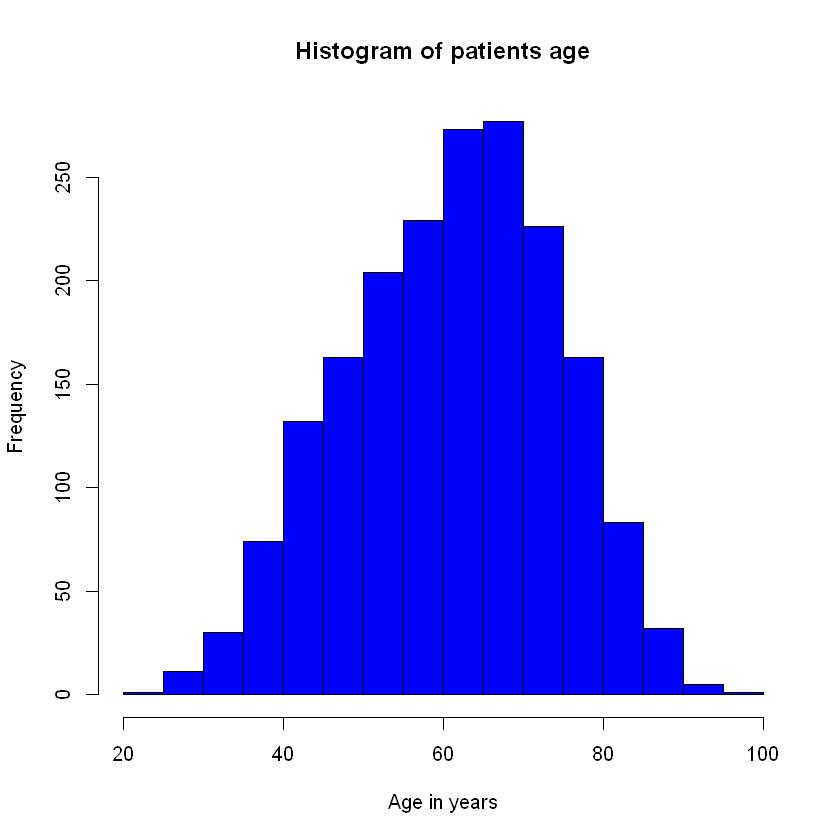

In [17]:
hist(data,
    main = "Histogram of patients age",
    xlab = "Age in years",
    col = "blue")

As we can see on the plot, this is left-skewed distribution.

It looks like it can be __normal distribution__. Let's plot density function for data:

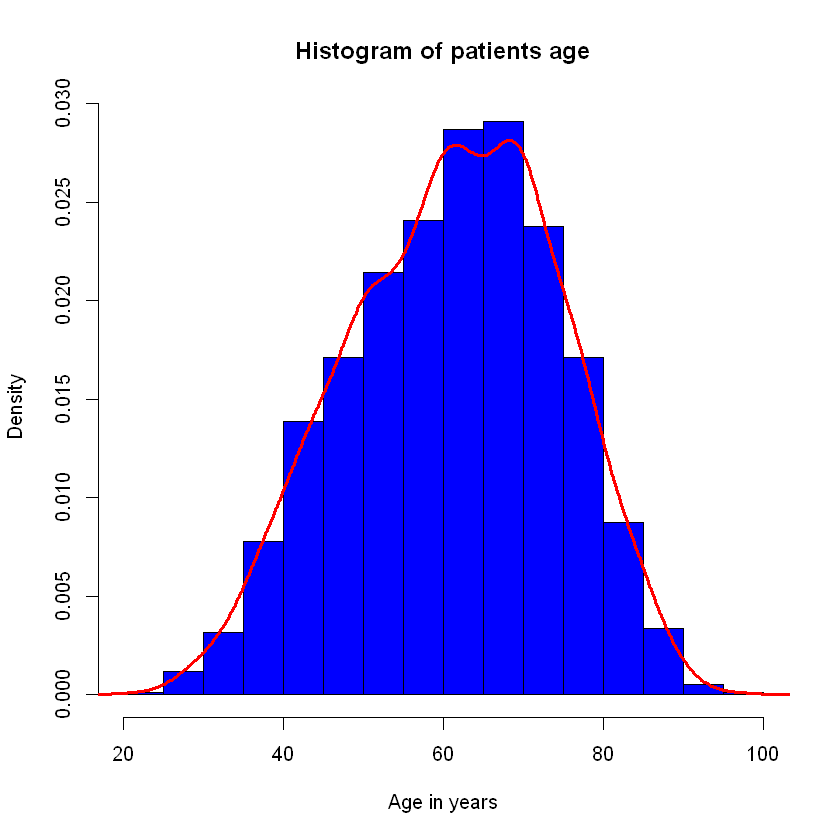

In [18]:
hist(data,
    main = "Histogram of patients age",
    xlab = "Age in years",
    col = "blue",
    prob = T, # helps to show densities instead of requencies
    breaks = 12) # how many bins we need on the plot; it is a suggestion
lines(density(data), # creates empirical density function
      lw = 3, col = "red") 

To understand better we can also plot normal distribution near the density curve.

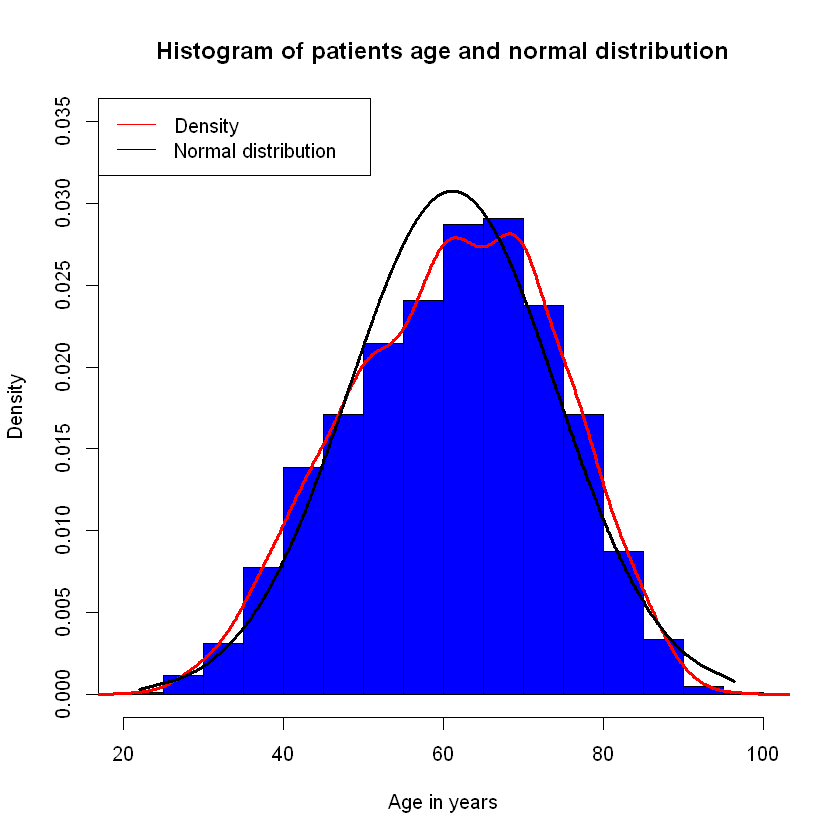

In [19]:
hist(data,
    main = "Histogram of patients age and normal distribution",
    xlab = "Age in years",
    col = "blue",
    prob = T,
    breaks = 12, 
    ylim = c(0, 0.035)) 
lines(density(data), lw = 3, col = "red") 
lines(sorted, dnorm(sorted, mean = mean(sorted), sd = sd(sorted)), lw = 3)
legend("topleft", legend = c("Density", "Normal distribution"), 
       col = c("red", "black"), 
       lty=1) # type of line

Okay, it is near, but the peak is a bit moved to right.

## Step 3: outliers

- $\hat{Q}_1$ - first quartile: no more than 25% observations to the left, 75% to the right of the item in sorted sample
- $\hat{Q}_3$ - third quartile: no more than 75% observations to the left, 25% to the right
- $\hat{IQR} = \hat{Q}_3 - \hat{Q}_1$


$$outliers \notin [\hat{Q}_1 - 1.5\times \hat{IQR}; \hat{Q}_3 + 1.5\times \hat{IQR}] $$

In [20]:
# finding quartile using function
quantile(data, type = 1)

0%   25%   50%   75%  100% 
21.93 51.36 61.76 70.59 96.29

We know, that 

$$Q_1 = \pi_{25}$$
$$Q_3 = \pi_{75}$$

So we need 25% and 75% values.

In [21]:
# finding using formula

Q1 <- sorted[ceiling(l*0.25)]
Q1

[1] 51.36

In [22]:
Q3 <- sorted[ceiling(l*0.75)]
Q3

[1] 70.59

In [23]:
IQR <- Q3-Q1

down <- Q1 - 1.5*IQR
up <- Q3 + 1.5*IQR

print(down)
print(up)

[1] 22.515
[1] 99.435


$$outliers \notin [22.515, 99.435]$$

In [24]:
data[data > up | down > data]

[1] 21.93

Here we can see, that there is one outlier. Let's look on boxplot to prove that:

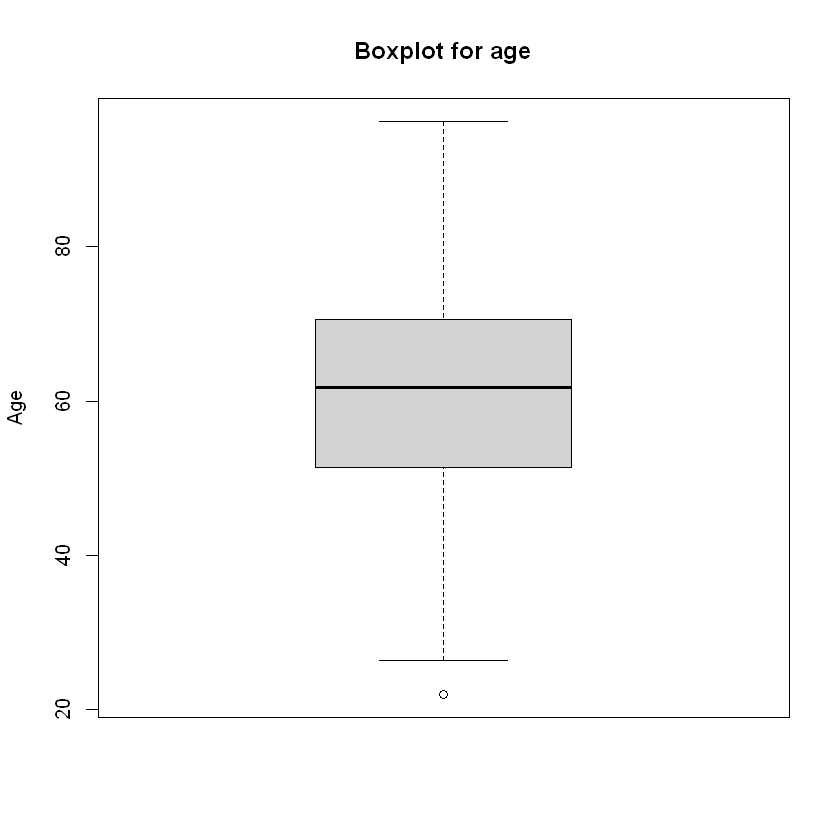

In [25]:
boxplot(data,
       main = "Boxplot for age",
       ylab = "Age")

We were right - here on the boxplot we see one outlier.   
From the plot we also can see, how skewed is the distribution of data: the median is not in the middle of the box, it is closer to highest border. But the whiskers, that are representing valid bounds of data values, have the same length. 

## Step 4: confidence intervals

### Confidence interval for mean

To construct %95 confidence intervals we should get small sub-sample from data.  
Let's find 20 items to construct confidence interval for them.

In [34]:
library(pracma)

# generate random index from 0 to l-20
rand <- ceil(runif(1, 0, l-20))
rand # here I got 755

[1] 1379

In [35]:
#sample <- data[rand:(rand+19)]
sample <- data[755:(755+19)]
sample

[1] 68.72 49.45 60.45 53.89 54.60 65.89 43.56 63.82 49.37 54.29 62.03 35.50
[13] 57.91 76.96 74.51 70.31 61.16 66.37 64.91 73.15

In [36]:
s_m <- mean(sample)
s_sd <- sd(sample)

Since we took small number of data, we can use student's distribution to calculate the mean CI:

$$\overline{X} \pm t_{\alpha/2}\frac{s}{\sqrt{n}}$$
$$1 - \alpha = 95\% \Leftrightarrow \alpha = 5\% \Leftrightarrow \frac{\alpha}{2} = 0.025$$
Number degrees of freedom: $n-1$

In [37]:
# finding t-student value

degrees <- length(sample) - 1
alpha_2 = 0.025

student <- qt(alpha_2, degrees, lower.tail = F)
student

[1] 2.093024

In [38]:
lower <- s_m - student*s_sd/sqrt(length(sample))
upper <- s_m + student*s_sd/sqrt(length(sample))


print(lower)
print(upper)

[1] 55.34199
[1] 65.34301


Confidence interval for sample mean is: $[55.342, 65.343]$

__Another approach__  
If we are talking about real data, we are always speaking about samples, not really about full population values. So in this work I assumed, that my dataset contains also sample values.

But in this part of the project we are finding subsample of original sample data. For this case let's imagine, that the original data $\overline{X} \approx \mu$ and $s^2 \approx \sigma^2$. For this case we can calculate subsample's mean CI in different way (this would be a case, where the $\sigma$ is known):

$$\overline{X} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \$$

$$1-\alpha = 0.95 \Leftrightarrow \alpha = 0.05 \Leftrightarrow \frac{\alpha}{2} = 0.025$$

In [45]:
z_alpha_2 <- qnorm(alpha_2, lower.tail = F)
z_alpha_2

[1] 1.959964

In [40]:
lower_2 <- s_m - z_alpha_2 * s / sqrt(length(sample))
upper_2 <- s_m + z_alpha_2 * s / sqrt(length(sample))

print(lower_2)
print(upper_2)

[1] 54.65443
[1] 66.03057


Using this unusual approach, we got a bit wider confidence interval for sample mean: $\mu \in [54.654, 66.03]$


### Confidence interval for variance

_Since lectures of second part of the semester were told in turkish, I didn't understand this clearly. In Michael Baron's book there's no clear explanation, how to find variance CI. So I will use formula from David J. Sheskin's book "Handbook of Parametric and Nonparametric Statistical Procedures"_

Confidence interval for population variance is calculated is follows:

$$\frac{(n-1)s^2}{\chi^2_{\frac{\alpha}{2}, n-1}} \leq \sigma^2 \leq \frac{(n-1)s^2}{\chi^2_{1 -\frac{\alpha}{2}, n-1}}$$

In [42]:
# CI using sample

chi_1_alpha <- qchisq(1-alpha_2, degrees, lower.tail = F)
chi_alpha <- qchisq(alpha_2, degrees, lower.tail = F)

print(chi_1_alpha)
print(chi_alpha)

[1] 8.906516
[1] 32.85233


In [43]:
lower_s <- (degrees*s_sd*s_sd)/chi_alpha
upper_s <- (degrees*s_sd*s_sd)/chi_1_alpha

print(lower_s)
print(upper_s)

[1] 66.02328
[1] 243.5316


Confidence interval for variance is: $[66.02328, 243.5316]$

__Another one try__  

Since we have more big sample, let's try to estimate population variance using full given data.

In [50]:
chi_1_alpha_2 <- qchisq(1-alpha_2, l-1, lower.tail = F)
chi_alpha_2 <- qchisq(alpha_2, l-1, lower.tail = F)

print(chi_1_alpha_2)
print(chi_alpha_2)

[1] 1783.99
[1] 2025.799


In [51]:
lower_s_2 <- ((l-1)*s*s)/chi_alpha_2
upper_s_2 <- ((l-1)*s*s)/chi_1_alpha_2

print(lower_s_2)
print(upper_s_2)

[1] 158.2361
[1] 179.6841


Now we see, that CI became smaller, because we used more accurate estimators value.

### Estimating proportions with given precision

__We can also find size of sample to estimate the population mean with margin at most 0.1 units with confidence 90%.__

The estimated minimum sample size $n$ needed to estimate a population mean $\mu$ to within $\Delta$ units at $100(1−\alpha)$% confidence is

$$n \geq (\frac{z_{\alpha/2}\bullet \sigma}{\Delta})^2$$ 

Here we will use estimator of standard deviation, because we don't know the real value.

$$\Delta = 0.1$$
$$1-\alpha = 0.9 \Leftrightarrow \alpha/2 = 0.05$$

In [44]:
z_alpha <- 1.645 # from table

# find value for full sample
value1 <- ceiling((z_alpha*s/0.1)^2)

# find value for subsample
value2 <- ceiling((z_alpha*s_sd/0.1)^2)

print(value1)
print(value2)

[1] 45583
[1] 30892


$$n_1 \geq 45583$$
$$n_2 \geq 30892$$

We can see two different results: second one is smaller by 50% because of not enough information about known sample.